## Landed Take Home - Reno Vieira Neto
### Import libraries and data exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Expansion Ops Take-Home (1).xlsx', sheet_name='Data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623 entries, 0 to 3622
Data columns (total 21 columns):
Contact ID                3623 non-null int64
Create Date               3623 non-null datetime64[ns]
Employer                  3604 non-null object
Employer County           3540 non-null object
Employer Launch Date      2410 non-null datetime64[ns]
Interested Date           3616 non-null datetime64[ns]
Eligible Date             3304 non-null datetime64[ns]
Qualified Date            1143 non-null datetime64[ns]
Convinced Date            512 non-null datetime64[ns]
Onboarded Date            228 non-null datetime64[ns]
Active Date               101 non-null datetime64[ns]
Offer Accepted Date       84 non-null datetime64[ns]
Transacted Date           79 non-null datetime64[ns]
Partnership Live Date     70 non-null datetime64[ns]
Partnership Ended Date    0 non-null float64
Marketing Channel         3623 non-null object
First Page Seen           2830 non-null object
Average Pageviews 

In [4]:
df.head()

,Contact ID,Create Date,Employer,Employer County,Employer Launch Date,Interested Date,Eligible Date,Qualified Date,Convinced Date,Onboarded Date,...,Offer Accepted Date,Transacted Date,Partnership Live Date,Partnership Ended Date,Marketing Channel,First Page Seen,Average Pageviews,New Home Timeline,Income Score,Savings Score
0,1,2019-09-24 23:10:00,East Side Union High,Santa Clara,2017-12-31,2019-09-24,2019-09-24,NaT,NaT,NaT,...,NaT,NaT,NaT,NaN,Direct Traffic,https://www.landed.com/sign-up-pre-steps,0,NaN,NaN,NaN
1,2,2019-09-24 19:43:00,Franklin-McKinley Elementary,Santa Clara,NaT,2019-09-24,2019-09-24,NaT,NaT,NaT,...,NaT,NaT,NaT,NaN,Direct Traffic,https://www.landed.com/lounge,1,NaN,NaN,NaN
2,3,2019-09-24 19:07:00,Orchard Elementary,Santa Clara,NaT,2019-09-24,2019-09-24,NaT,NaT,NaT,...,NaT,NaT,NaT,NaN,Offline Sources,NaN,0,NaN,NaN,NaN
3,4,2019-09-24 19:07:00,Alum Rock Union Elementary,Santa Clara,2018-02-04,2019-09-24,2019-09-24,NaT,NaT,NaT,...,NaT,NaT,NaT,NaN,Offline Sources,NaN,0,NaN,NaN,NaN
4,5,2019-09-24 19:07:00,Alum Rock Union Elementary,Santa Clara,2018-02-04,2019-09-24,2019-09-24,NaT,NaT,NaT,...,NaT,NaT,NaT,NaN,Offline Sources,NaN,0,NaN,NaN,NaN


In [5]:
#Create columns for each date type
df['month'] = pd.DatetimeIndex(df['Create Date']).month
df['year'] = pd.DatetimeIndex(df['Create Date']).year
df['date'] = pd.DatetimeIndex(df['Create Date']).date

## 1. What is the ratio of transacted customers to leads in employers where we've launched?

In [6]:
#Filtering only for Launched Employers and adding a binary column 'transacted?' (0 or 1)
df['transacted?'] = np.where(df['Transacted Date'].isnull(), 0, 1)
ratio = df[~pd.isnull(df['Employer Launch Date'])]

In [7]:
#Overall Transacted/Lead for Launched Employers
overall_ratio = ratio['transacted?'].sum()/ratio.shape[0]
print('The Overall Transacted/Lead Ratio for Launched Employers is: ' + str(round(overall_ratio,4)))

The Overall Transacted/Lead Ratio for Launched Employers is: 0.0237


However, I think it would be interesting to see the same ratio by Employer or Location.
### Overall Transacted/Lead Ratio by Employer - Top 10 Employers

In [8]:
#Top 10 Employers by Ratio
ratio_employer = ratio.groupby('Employer').sum()['transacted?']/ratio.groupby('Employer').count()['Contact ID']
ratio_employer = ratio_employer.reset_index()
ratio_employer.columns = ['Employer', 'Transacted/Lead Ratio']
plot_me = ratio_employer.sort_values('Transacted/Lead Ratio', ascending=False).head(10)

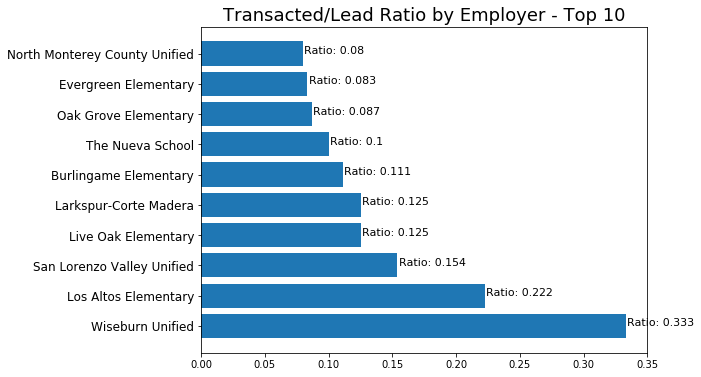

In [9]:
#Create plot
x = plot_me['Transacted/Lead Ratio']
y = plot_me['Employer']

#Create chart
fig, axs = plt.subplots()
plt.subplots_adjust(wspace = 0.3)
fig.set_size_inches(8,6)

#Horizontal Bar, Visuals and Labels
axs.barh(y,x)
axs.set_yticklabels(y, fontsize = 12)

#Loop through y and put the Cost per Click next to the bar
for idx in x.index:
    s = 'Ratio: ' + str(x[idx].round(3))
    x2 = x[idx] + 0.001
    y2 = y[idx] 
    axs.text(x2, y2, s, fontsize=11)
axs.set_title('Transacted/Lead Ratio by Employer - Top 10', size = 18);

### Overall Transacted/Lead Ratio by County - Top 10 Employers

In [10]:
#Top 10 Employers by County
ratio_employer = ratio.groupby('Employer County').sum()['transacted?']/ratio.groupby('Employer County').count()['Contact ID']
ratio_employer = ratio_employer.reset_index()
ratio_employer.columns = ['Employer County', 'Transacted/Lead Ratio']
plot_me = ratio_employer.sort_values('Transacted/Lead Ratio', ascending=False).head(10)

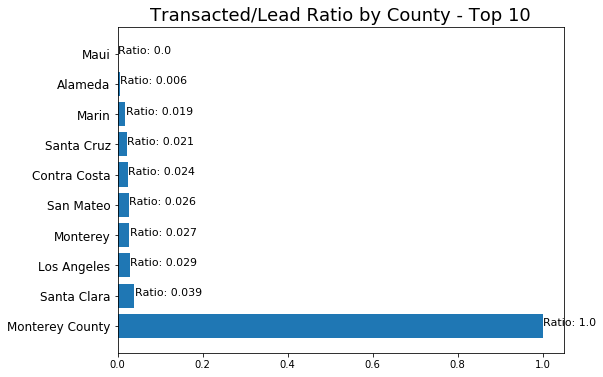

In [11]:
#Create plot
x = plot_me['Transacted/Lead Ratio']
y = plot_me['Employer County']

#Create chart
fig, axs = plt.subplots()
plt.subplots_adjust(wspace = 0.3)
fig.set_size_inches(8,6)

#Horizontal Bar, Visuals and Labels
axs.barh(y,x)
axs.set_yticklabels(y, fontsize = 12)
for idx in x.index:
    s = 'Ratio: ' + str(x[idx].round(3))
    x2 = x[idx] + 0.001
    y2 = y[idx] 
    axs.text(x2, y2, s, fontsize=11)
axs.set_title('Transacted/Lead Ratio by County - Top 10', size = 18);

Interesting to see that 'Monterey County' has the highest ratio, it might be due to some miscalculation we're doing here. Let's review what's going on here

In [12]:
#Number of leads from 'Monterey County'
ratio[ratio['Employer County'] == 'Monterey County'].shape[0]

1

The county had only one Lead which converted to Transacted, giving a ratio of 1 or 100%. Let's remove the county and see how things look.

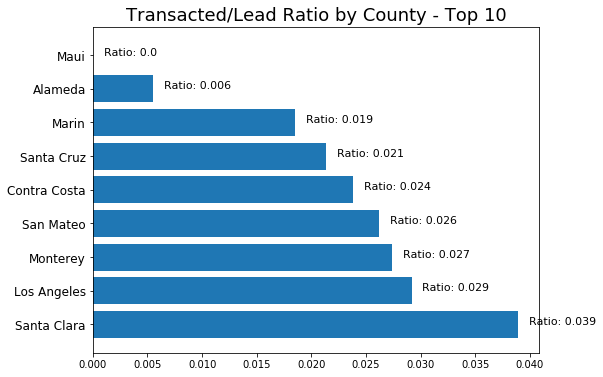

In [13]:
plot_me = plot_me[plot_me['Employer County'] != 'Monterey County']

#Create plot
x = plot_me['Transacted/Lead Ratio']
y = plot_me['Employer County']

#Create chart
fig, axs = plt.subplots()
plt.subplots_adjust(wspace = 0.3)
fig.set_size_inches(8,6)

#Horizontal Bar, Visuals and Labels
axs.barh(y,x)
axs.set_yticklabels(y, fontsize = 12)
for idx in x.index:
    s = 'Ratio: ' + str(x[idx].round(3))
    x2 = x[idx] + 0.001
    y2 = y[idx] 
    axs.text(x2, y2, s, fontsize=11)
axs.set_title('Transacted/Lead Ratio by County - Top 10', size = 18);

Now, instead of giving just the overall average, you have a detailed view of the ratio by Employer and County. The next step would be to analyze different periods trying to identify a trend.

## 2. On average, how long does it take for a lead to reach the transacted stage?

In [14]:
#Calculate difference between Transacted Date and Create Date
df['Transacted - Create'] = df['Transacted Date'] - df['Create Date']
question_2 = df[~pd.isnull(df['Transacted - Create'])]
question_2['Transacted - Create'].mean()

Timedelta('246 days 09:13:18.227848')

246 days seem to be to high for me, maybe the distribution will give us a better understanding of the data.

### Distribution of difference between Transacted and Create Dates

Mean: 246.0
Mode: 156.0
Median: 172.0
Standard Deviation: 184


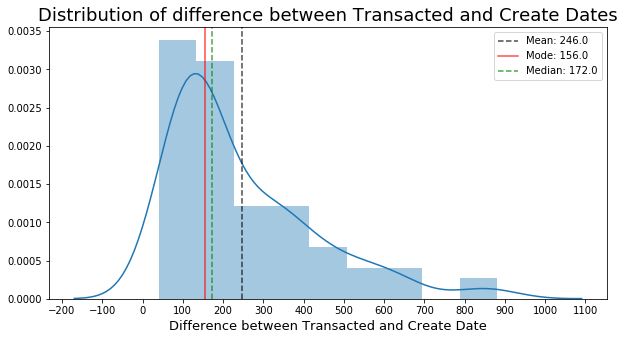

In [15]:
#Create column with calculation of difference between Transacted and Create
question_2['Transacted - Create'] = question_2['Transacted - Create'].apply(lambda x: float(x.days))

#Create chart
fig, axs = plt.subplots()
fig.set_size_inches(10,5)

#Define x to plot
x = question_2['Transacted - Create']

#Create a distribution chart, set labels and x ticks.
g = sns.distplot(x, kde=True, norm_hist=False)
g.set_xticks(np.arange(-200, 1200, 100))
g.set_xlabel('Difference between Transacted and Create Date', fontsize=13)

#Plot a vertical line for each metric
g.plot([x.mean(), x.mean()], [0,0.004], "--", color='black', alpha=0.7, label='Mean: ' + str(x.mean()))
g.plot([x.mode(), x.mode()], [0,0.004], "-", color='red', alpha=0.7, label='Mode: ' + str(x.mode().item()))
g.plot([x.median(), x.median()], [0,0.004], "--", color='green', alpha=0.7, label='Median: ' + str(x.median()))
g.legend()
plt.title('Distribution of difference between Transacted and Create Dates', size = 18);

print('Mean: ' + str(x.mean()))
print('Mode: ' + str(x.mode().item()))
print('Median: ' + str(x.median()))
print('Standard Deviation: ' + str(round(x.std())))

After plotting the distribution of differences, it's possible to see a right-skewed histogram.

For a better understanding of the difference in days, it's necessary to calculate other essential metrics: Mode, Median, and Standard Deviation.
- Mode: The mode of a set of data values is the value that appears most often = 156 days
- Median: The median is a simple measure of central tendency. It's the middle value in a set = 172 days
- Standard Deviation: Measures the variance of your distribution, high numbers represent a disperse distribution = 184 days > high

I think a boxplot would give us even more insights about the data:
### Boxplot

First Quantile: 120
Third Quantile: 333


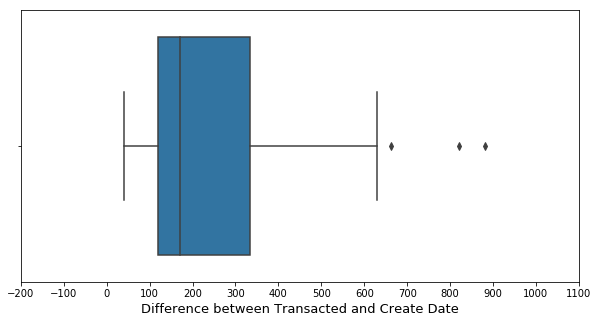

In [16]:
print('First Quantile: ' + str(round(x.quantile(0.25))))
print('Third Quantile: ' + str(round(x.quantile(0.75))))
fig, axs = plt.subplots()
fig.set_size_inches(10,5)
g = sns.boxplot(x)
g.set_xlabel('Difference between Transacted and Create Date', fontsize=13)
g.set_xticks(np.arange(-200, 1200, 100));

Understanding a boxplot:
- The line inside of the blue box represents the median, which was already discussed before.
- The extremes of the box represent the first and third quartiles, which contain 50% of the data:
    - First Quartile = 120 days
    - Third Quartile = 333 days
- The vertical lines outside the box are min and max, while the points on the right side represent outliers.

Therefore, the average of 246 days is not a good representation; it's crucial to analyze those other metrics and understand that we're dealing with a right-skewed distribution. Outliers will bring the average value up, which might give us the wrong idea about how many days it takes from Create to Transacted Date. My suggestion would be to analyze those outliers and maybe run a second analysis without them.

## 3. Marketing channel questions
### - a) For employers where we've launched, which marketing channel has the highest ratio of transacted customers to leads? Which has the lowest?

### Overall Ratio by Marketing Channel

In [17]:
#Calculating overall ratio by Marketing Channel
answer_a = ratio.groupby('Marketing Channel').sum()['transacted?']/ratio.groupby('Marketing Channel').count()['Contact ID']
answer_a = answer_a.reset_index()
answer_a.columns = ['Marketing Channel', 'Transacted/Leads Ratio']
answer_a.sort_values('Transacted/Leads Ratio', ascending=False)

,Marketing Channel,Transacted/Leads Ratio
6,Referrals,0.066667
2,Offline Sources,0.031818
3,Organic Search,0.027778
0,Direct Traffic,0.020513
5,Paid Social,0.016949
1,Email Marketing,0.000000
4,Other Campaigns,0.000000
7,Social Media,0.000000


As you can see above, overall, the best channel is 'Referrals', while the lowest are 'Social Media', 'Other Campaigns' and 'Email Marketing'. However, it's important to say that these channels have no Transacted data, therefore, the ratio will always be zero. If you exclude those from the analysis, the lowest would be 'Paid Social'.

Maybe it would be interesting to analyze different periods:

### Annual Ratio by Marketing Channel

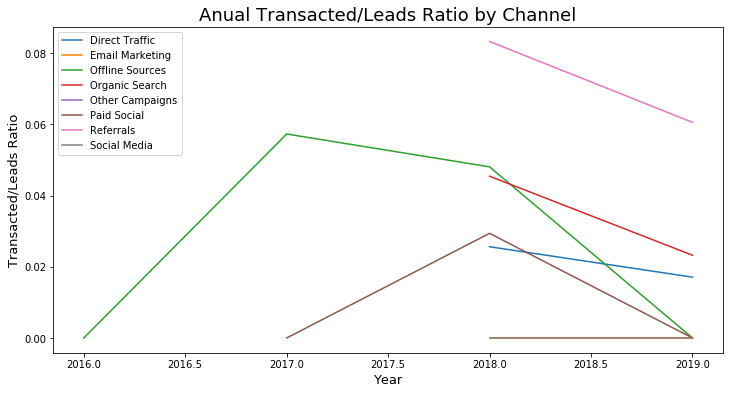

In [18]:
#Create dataframe with the ratio per year by Marketing Channel
answer_a2 = ratio.groupby(['year','Marketing Channel']).sum()['transacted?']/ratio.groupby(['year','Marketing Channel']).count()['Contact ID']
answer_a2 = answer_a2.reset_index()
answer_a2.columns = ['Year', 'Marketing Channel', 'Transacted/Leads Ratio']
answer_a2 = answer_a2.sort_values('Marketing Channel')

#Plot
fig, axs = plt.subplots()
fig.set_size_inches(12,6)

#Go through list of Marketing Channels and plot each one
for channel in answer_a2['Marketing Channel'].unique(): 
    x = answer_a2[answer_a2['Marketing Channel'] == channel]['Year']
    y = answer_a2[answer_a2['Marketing Channel'] == channel]['Transacted/Leads Ratio']
    axs.plot(x, y, label=channel)

#Set xticks, legend and labels 
axs.set_xticks([2016, 2017, 2018, 2019], 1)
axs.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Transacted/Leads Ratio', fontsize=13)
plt.title('Anual Transacted/Leads Ratio by Channel', fontsize=18)
plt.show();

Even though we don't have the complete data for 2019, it's possible to conclude that channels are not performing well relative to 2018. All channels had better ratios in 2018, maybe most transactions happen at the end of the year?

Moreover, it's interesting to see how 'Offline Sources' had a good ratio in 2017, but maybe because of the lack of data for the other channels might be that this used to be the only channel available. It would be interesting to understand the strategy behind it.

In 2018, as we can see above, other channels were introduced and 'Offline Sources' declined considerably in the following year. Maybe the idea was to stop using this type of Channel?

'Referrals' though has the highest numbers relative to others but also presents a downward trend, maybe because we don't have the whole data for 2019.

## - b) Why wouldn't it make sense to invest in the channel that has the highest ratio? What other data could help us make this decision?

We need to analyze the Marketing Funnel here and see where the bottlenecks are. Maybe there's an efficient channel that doesn't have a good ratio yet.

### Funnel Analysis

In [19]:
#Start by calculating total number of leads per channel
answer_b = ratio.groupby('Marketing Channel').count()['Contact ID']
answer_b = answer_b.reset_index()
answer_b.columns = ['Marketing Channel', 'Number of Leads']
answer_b = pd.merge(answer_a, answer_b)

In [20]:
#Now, for the Funnel Analysis, I'm going to create binary columns for each step of the process
mkt_funnel = ['Interested Date', 'Eligible Date','Qualified Date', 'Convinced Date', 'Onboarded Date', 'Active Date',
             'Offer Accepted Date', 'Transacted Date', 'Partnership Live Date','Partnership Ended Date']
new_columns = ['interested?', 'eligible?', 'qualified?', 'convinced?', 'onboarded?', 'active?', 'offer_accepted?',
             'transacted?', 'partnership_live?', 'partnership_end?']

#Loop through list and create columns with values
for idx, funnel in enumerate(mkt_funnel):
    column_name = new_columns[idx]
    ratio[column_name] = np.where(ratio[funnel].isnull(), 0, 1)

In [21]:
#Finally, we can just sum the columns to get a total per step, see the result below.
for column in new_columns:
    temp_df = ratio.groupby('Marketing Channel').sum()[column]
    temp_df = temp_df.reset_index()
    temp_df.columns = ['Marketing Channel', column]
    answer_b = pd.merge(answer_b, temp_df)

#Result
answer_b.sort_values('Transacted/Leads Ratio', ascending=False)

,Marketing Channel,Transacted/Leads Ratio,Number of Leads,interested?,eligible?,qualified?,convinced?,onboarded?,active?,offer_accepted?,transacted?,partnership_live?,partnership_end?
6,Referrals,0.066667,45,45,44,21,4,4,3,3,3,1,0
2,Offline Sources,0.031818,1320,1314,1165,458,331,132,51,43,42,39,0
3,Organic Search,0.027778,108,108,108,57,15,12,8,5,3,2,0
0,Direct Traffic,0.020513,390,390,385,176,30,22,10,8,8,6,0
5,Paid Social,0.016949,59,59,53,28,13,3,1,1,1,1,0
1,Email Marketing,0.000000,457,457,457,56,4,1,0,0,0,0,0
4,Other Campaigns,0.000000,2,2,2,0,0,0,0,0,0,0,0
7,Social Media,0.000000,29,29,29,3,1,0,0,0,0,0,0


Okay, now that we have the total count of each step of the process by channel, it's time to calculate all different ratios between each. These will give us an idea of where it starts losing most of the clients.

In [22]:
#Create all these ratios
answer_b['Eligible/Interested'] = answer_b['eligible?']/answer_b['interested?']
answer_b['Qualified/Eligible'] = answer_b['qualified?']/answer_b['eligible?']
answer_b['Convinced/Qualified'] = answer_b['convinced?']/answer_b['qualified?']
answer_b['Onboarded/Convinced'] = answer_b['onboarded?']/answer_b['convinced?']
answer_b['Active/Onboarded'] = answer_b['active?']/answer_b['onboarded?']
answer_b['Accepted/Active'] = answer_b['offer_accepted?']/answer_b['active?']
answer_b['Transacted/Accepted'] = answer_b['transacted?']/answer_b['offer_accepted?']
answer_b['Live/Transacted'] = answer_b['partnership_live?']/answer_b['transacted?']
answer_b['End/Live'] = answer_b['partnership_end?']/answer_b['partnership_live?']

#Result
answer_b[['Marketing Channel', 'Transacted/Leads Ratio', 'Number of Leads', 'transacted?', 'Eligible/Interested', 'Qualified/Eligible', 'Convinced/Qualified', 
          'Onboarded/Convinced', 'Active/Onboarded','Accepted/Active', 'Transacted/Accepted', 'Live/Transacted',
          'End/Live']].sort_values('Transacted/Leads Ratio', ascending=False)

,Marketing Channel,Transacted/Leads Ratio,Number of Leads,transacted?,Eligible/Interested,Qualified/Eligible,Convinced/Qualified,Onboarded/Convinced,Active/Onboarded,Accepted/Active,Transacted/Accepted,Live/Transacted,End/Live
6,Referrals,0.066667,45,3,0.977778,0.477273,0.190476,1.000000,0.750000,1.000000,1.000000,0.333333,0.0
2,Offline Sources,0.031818,1320,42,0.886606,0.393133,0.722707,0.398792,0.386364,0.843137,0.976744,0.928571,0.0
3,Organic Search,0.027778,108,3,1.000000,0.527778,0.263158,0.800000,0.666667,0.625000,0.600000,0.666667,0.0
0,Direct Traffic,0.020513,390,8,0.987179,0.457143,0.170455,0.733333,0.454545,0.800000,1.000000,0.750000,0.0
5,Paid Social,0.016949,59,1,0.898305,0.528302,0.464286,0.230769,0.333333,1.000000,1.000000,1.000000,0.0
1,Email Marketing,0.000000,457,0,1.000000,0.122538,0.071429,0.250000,0.000000,NaN,NaN,NaN,NaN
4,Other Campaigns,0.000000,2,0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Social Media,0.000000,29,0,1.000000,0.103448,0.333333,0.000000,NaN,NaN,NaN,NaN,NaN


#### Referrals:
- Has the best Transacted/Leads Ratio > 45 Leads > 3 Transacted.
- During the process, something happens during the 'Qualified' and 'Convinced' steps. Maybe, something could be done on the 'Eligible' step to avoid them from starting the process. Having a more streamlined and efficient process is important for the company because it means less money spent with clients that don't fit the criteria/qualify.
- Another good point is that a better job has to be done on the 'Convinced' step. Not sure what happens during the meeting with these clients, but only 20% are 'Convinced'.

#### Offline Sources:
- Has the second-best Transacted/Leads Ratio > 1320 Leads > 42 Transacted.
- The same problem during the 'Qualified' process; apparently, this is a problem across all different channels. Probably clients don't give all the information necessary for the analysis of previous steps. However, it's important to understand the target and focus your Marketing budget to attract clients that fit our criteria.
- Surprisingly, 'Convinced' is high, I'd like to understand why, because I think it's the same process for all clients, regardless of the channel.
- On the other hand, 'Active' and 'Onboarded' have low ratios relative to others.

#### Organic Search:
- Third best Transacted/Leads Ratio > 108 Leads > 3 Transacted.
- Issues on the 'Qualified' and 'Convinced' steps, similar to 'Referrals' up until 'Accepted', where start losing clients with 60% ratio on each following step.

#### Direct Traffic:
- 390 Leads > 8 Transacted.
- Low 'Convinced', clearly something has to be done during this step of the process.

#### Paid Social:
- 59 Leads > 1 Transacted.
- Issues on the 'Onboarded' and 'Active' steps.

#### Others: Email Marketing, Other Campaigns, and Social Media
- Have no transacted customers. It's interesting to see how Email Marketing generates Leads but doesn't seem to filter qualified clients during the process. For the other two channels, more data would be necessary to have more conclusions.

#### Conclusion:
- It'd be better to have a good understanding of each step of the process and see if they differ depending on the channel (which I doubt). There's a good opportunity to improve the 'Qualified' and 'Convinced' steps. I think a good understanding of the clients would help the business to attract 'high quality' clients, and a better job has to be done on the 'Convinced' step (although I'm not sure what exactly happens during this process).
- 'Email Marketing' is good at generating Leads; however, it has not generated a single transaction. Again, it would be great to understand the strategy behind and maybe change the communication or the target group of these emails.
- 'Referrals' seems to be complicated to invest, maybe a campaign could stimulate referrals, but that would rely on others, and it can be costly because probably it would involve discount to existing clients. A good program might increase referrals, but I think it's important first to build a brand, and then referrals will come naturally.
- Although 'Offline Sources' doesn't seem to be the preferred channel (based on previous analysis 3.a), I think having a good understanding of what type of clients we want might help increase the ratio of 'Qualified/Eligible' and 'Offline Sources' seems to generate a lot of Leads.

#### More Data:
- It would be beneficial to understand the cost of each channel, things like 'Cost per Lead' or 'per Ad'. Some channels might have a lower 'Transacted/Lead' Ratio. However, if it's cheap enough, it might be a good investment that will bring at the end a higher volume of transactions.
- A better understanding of each channel and the steps behind. Are the steps the same regardless of the channel?
- What's the goal? Create awareness? Increase transactions? Increase Leads? It seems like a better job can be done at filtering clients at the very beginning of the process.
- Understanding the successful cases can also help us to identify what type of clients we're serving, their characteristics, and, consequently, the best channel to get to them.
- 'Referrals', 'Direct Traffic', and 'Organic Search' are all 'organic' ways of acquiring clients because it starts from the Lead taking the initiative to either refer Landed to a friend, type the website, or search for the company online. It might be interesting to think about building awareness and get the name of the company out there.
- Based on the phone call I had with Alex, it's essential to build partnerships with Employers, because if they offer Landed to its employees, it might be easier for them to trust Landed. Therefore, focus on partnerships with these institutions is also really important. The best strategy to get there is probably by knowing someone that works at the place we're trying to get into; however, if employees start asking for Landed, then it could become something that will naturally grow because then other institutions will have the same request. 

### 4. Compare the performance of leads that are created during the launch window (within 30 days of the launch date) vs. post-launch. Why might this be? What other data would be helpful to collect to prove this hypothesis?

In [23]:
#Create column with different between 'Create Date' and 'Launch Date'
df['Launch - Create'] = df['Create Date'] - df['Employer Launch Date']
question_4 = df[(~pd.isnull(df['Launch - Create'])) & (df['Launch - Create'].dt.days > -0.01)]
question_4['launch_window'] = np.where(question_4['Launch - Create'].dt.days < 31 , 'During', 'Post-Launch')

#See number of Leads by Marketing Channel and Launch Window
answer_4 = question_4.groupby(['launch_window','Marketing Channel']).count()['Contact ID']
answer_4 = answer_4.reset_index()
answer_4.columns = ['launch_window','Marketing Channel', 'Number of Leads']

In [24]:
#Convert timedelta type to number of days
question_4['days'] = question_4['Launch - Create'].dt.days

#Create the dataframe with Average Number of days by Launch Window and Marketing Channel
answer_42 = question_4.groupby(['launch_window','Marketing Channel']).mean()['days']
answer_42 = answer_42.reset_index()
answer_42.columns = ['launch_window','Marketing Channel','Average Number of Days']
answer_42['Average Number of Days'] = answer_42['Average Number of Days'].round(2)

#Merge it with the previous report
answer_4 = pd.merge(answer_4, answer_42, on=['launch_window','Marketing Channel'])

In [25]:
#Calculate total number of Leads per Channel and then see the percentage that comes from each window
answer_43 = question_4.groupby('Marketing Channel').count()['Contact ID']
answer_43 = answer_43.reset_index()
answer_43.columns = ['Marketing Channel', 'Total Leads per Channel']
answer_4 = pd.merge(answer_4, answer_43, on='Marketing Channel')

#Calculate percentage
answer_4['% of Leads'] = answer_4['Number of Leads']/answer_4['Total Leads per Channel']
answer_4['% of Leads'] = answer_4['% of Leads'].round(3) * 100

In [26]:
#Calculate sum of transactions by Marketing Channel and Window
answer_44 = question_4.groupby(['Marketing Channel','launch_window']).sum()['transacted?']
answer_44 = answer_44.reset_index()
answer_44.columns = ['Marketing Channel', 'launch_window', 'Total Transacted']

#Calculate total by Market Channel
answer_45 = question_4.groupby(['Marketing Channel']).sum()['transacted?']
answer_45 = answer_45.reset_index()
answer_45.columns = ['Marketing Channel', 'Total Transacted per Channel']

#Calculate % per Channel by Window
answer_4 = pd.merge(answer_4, answer_44, on=['Marketing Channel','launch_window'])
answer_4 = pd.merge(answer_4, answer_45, on='Marketing Channel')
answer_4['% of Transactions'] = answer_4['Total Transacted'] / answer_4['Total Transacted per Channel']
answer_4['% of Transactions'] = answer_4['% of Transactions'].round(4) * 100

#To avoid NaNs on the dataframe
answer_4 = answer_4.fillna(0)

In [27]:
#Result
answer_4[['launch_window', 'Marketing Channel', 'Number of Leads','Total Transacted',
       'Average Number of Days', '% of Leads','% of Transactions']].sort_values('Marketing Channel')

,launch_window,Marketing Channel,Number of Leads,Total Transacted,Average Number of Days,% of Leads,% of Transactions
0,During,Direct Traffic,71,1,8.27,21.8,14.29
1,Post-Launch,Direct Traffic,254,6,374.12,78.2,85.71
2,During,Email Marketing,1,0,21.00,0.2,0.00
3,Post-Launch,Email Marketing,453,0,418.63,99.8,0.00
4,During,Offline Sources,420,12,13.72,42.6,50.00
5,Post-Launch,Offline Sources,567,12,259.29,57.4,50.00
6,During,Organic Search,6,1,16.17,6.1,33.33
7,Post-Launch,Organic Search,93,2,388.91,93.9,66.67
14,Post-Launch,Other Campaigns,2,0,681.50,100.0,0.00
8,During,Paid Social,5,0,7.00,15.2,0.00


Notice that we have fewer Leads and Transactions, that's because some of the Leads/Transactions took place before the Launch Date.

Anyway, I think we can see better by plotting what we have above:

In [28]:
#Create unique_id to plot
answer_4['unique_id'] = answer_4['launch_window'] + answer_4['Marketing Channel']
answer_4 = answer_4.sort_values('Marketing Channel')

#Create color column to have different columns for each window
answer_4['color'] = 'cornflowerblue'
answer_4['color'][answer_4['launch_window'] == 'During'] = 'tomato'

### % of Leads by Channel and Launch Window

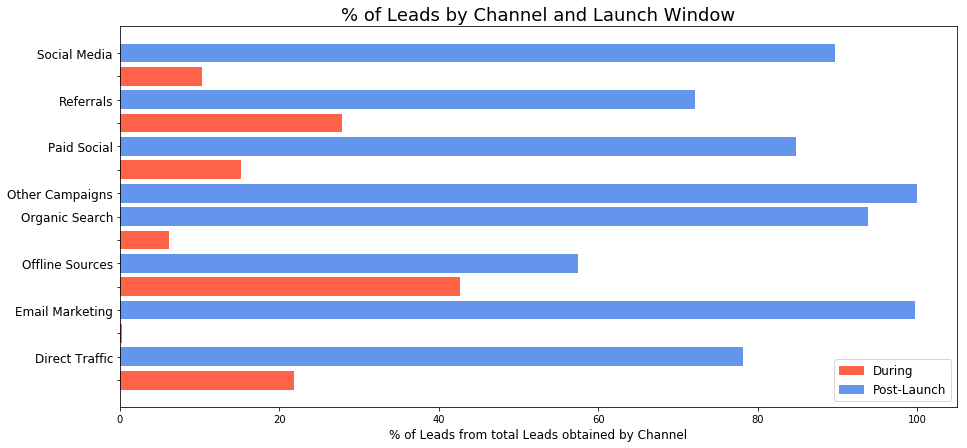

In [29]:
#Create chart
fig, axs = plt.subplots()
plt.subplots_adjust(wspace = 0.3)
fig.set_size_inches(15,7)

#create X and Y
y = answer_4['unique_id']
x = answer_4['% of Leads']

#Horizontal Bar, Visuals and Labels
axs.barh(y,x, color=answer_4['color'])
axs.set_yticklabels(['','Direct Traffic','','Email Marketing','','Offline Sources','','Organic Search','Other Campaigns','','Paid Social','','Referrals','','Social Media'], fontsize=12)

#Legend
red_patch = mpatches.Patch(color='tomato', label='During')
blue_patch = mpatches.Patch(color='cornflowerblue', label='Post-Launch')
axs.legend(handles=[red_patch, blue_patch],loc=4,prop={'size': 12})

axs.set_title('% of Leads by Channel and Launch Window', size = 18)
axs.set_xlabel('% of Leads from total Leads obtained by Channel', size = 12);

### % of Transactions by Channel and Launch Window

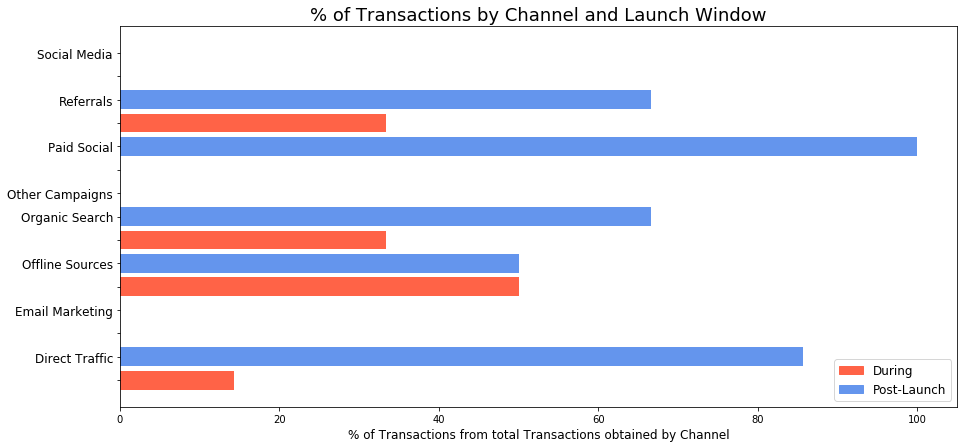

In [30]:
#Create chart
fig, axs = plt.subplots()
plt.subplots_adjust(wspace = 0.3)
fig.set_size_inches(15,7)

#Create X and Y
y = answer_4['unique_id']
x = answer_4['% of Transactions']

#Horizontal Bar, Visuals and Labels
axs.barh(y,x, color=answer_4['color'])
axs.set_yticklabels(['','Direct Traffic','','Email Marketing','','Offline Sources','','Organic Search','Other Campaigns','','Paid Social','','Referrals','','Social Media'], fontsize=12)

#Legend
red_patch = mpatches.Patch(color='tomato', label='During')
blue_patch = mpatches.Patch(color='cornflowerblue', label='Post-Launch')
axs.legend(handles=[red_patch, blue_patch],loc=4,prop={'size': 12})

axs.set_title('% of Transactions by Channel and Launch Window', size = 18)
axs.set_xlabel('% of Transactions from total Transactions obtained by Channel', size = 12);

#### Leads:
- Direct Traffic, Offline Sources, and Referrals: Have a relatively high percentage of Leads coming within 30 days of launch (20% to 40%). But for all the other channels, it's hard to say with certainty that there's an actual impact since the numbers are low.

#### Transactions:
- Referrals, Organic Search and Offline Sources: Have a high percentage of transactions coming within 30 days of launch, which is good given that we know how long it takes on average to a Lead becomes 'Transacted'. There may be an impact on how these people see Landed, given the fact that trust is essential for a transaction to happen, and launching a campaign with an employer might be a good way to build that trust.

#### More Data:
- It would be helpful to know how many employees were exposed to a given campaign, so we could see how much people from this pool become Leads. Maybe the number of attendees during the presentation.

### Bootstrapping/Simulations:

Create simulations and check the percentage of Leads within 30 days of Launch:

In [31]:
#Create empty list to store results
results = []

#Run 10 simulations picking 10,000 datapoints for each
for _ in range(10):
    
    #Create simulation
    simulation = np.random.choice(question_4['days'], size=10000)
    
    #Calculate Percentage of datapoints under 31 days
    perc_leads = sum(simulation < 31)/10000
    
    #Append perc_leads into results
    results.append(perc_leads)

In [32]:
#Calculate Mean
np.array(results).mean()

0.2629200000000001

Based on the simulations, it's possible to say that 26% of Leads came within 30 days of Launch. It's hard to say though if they came because of the Launch. Therefore, it would be great also to know if they attended the presentation or something like 'How did you hear about us?'.

## 5. Suggest three other data metrics that you would like to see in order to analyze how leads perform after an employer launch. Explain your rationale.

### 1. How did you hear about Landed?
- We found that 26% of Leads come within 30 days after running ten simulations with 10,000 randomly picked data points. However, we don't know if they came because of the launch, so I believe the question above would be helpful to confirm that. If that data was available, we could have a metric to track the ratio of Atendees/Leads. I'm not sure if the same presentation is given everytime, if not, then we could also test which one has a higher rate of success.

### 2. More data about the Employer
- It would be helpful to know the number of employees per employer or number of attendees on a presentation. Location can be beneficial, but maybe it would be interesting to cross that data with things like 'Type of Institution', maybe the business is more successful in specific institutions.
- Metrics: No. of Leads from X, Y and Z types of institutions. Size of institutions with higher conversion rate.

### 3. Data about the Real Estate market
- It would be great to understand the market that employees are dealing with, maybe neighborhoods with more postings on Zillow, for example, would help us to identify potential markets. Buying a house is a long process, and most people that are thinking about buying one are probably researching and studying the market. Therefore, there's more chance to have employees looking for houses in neighborhoods with more postings.